# Cylindrical Fibers with step index

**Scott Prahl**

**Mar 2021**

Graphs and tables from Chapter 8 of Ghatak.

---
*If* `` ofiber `` *is not installed, uncomment the following cell (i.e., delete the initial #) and execute it with* `` shift-enter ``.  *Afterwards, you may need to restart the kernel/runtime before the module will import successfully.*"

In [1]:
#!pip install --user ofiber

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

try:
    import ofiber

except ModuleNotFoundError:
    print('ofiber is not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## Single mode in a circular step fiber V=2 

(Ghatak Fig 8.1)

Use `ofiber.plot_LP_modes` to make a quick plot showing the allowed modes.

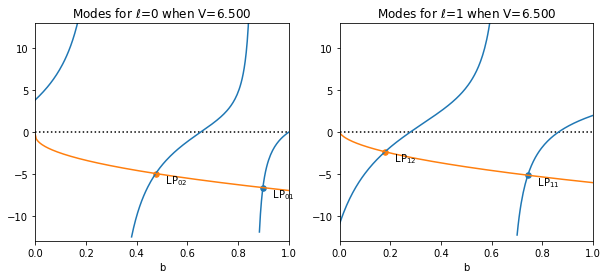

LP_01, b=0.8977
LP_02, b=0.4752
LP_11, b=0.7422
LP_12, b=0.1792


In [3]:
V=6.5
ell = 0
plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)
aplt = ofiber.plot_LP_modes(V,ell)
plt.subplot(1, 2, 2)
ell=1

aplt = ofiber.plot_LP_modes(V,ell)
aplt.show()

for ell in range(2):
    all_b = ofiber.LP_mode_values(V,ell)
    for i,b in enumerate(all_b):
        print("LP_%d%d, b=%.4f"%(ell,i+1,b))

## Multiple modes in a circular step fiber V=12.5

Use `ofiber.plot_LP_modes` to make a quick plot showing the allowed modes.

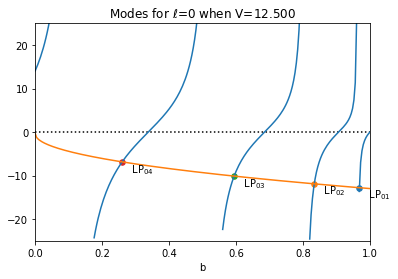

LP_01, b=0.9683
LP_02, b=0.8336
LP_03, b=0.5942
LP_04, b=0.2597
LP_11, b=0.9196
LP_12, b=0.7319
LP_13, b=0.4427
LP_14, b=0.0735
LP_21, b=0.8558
LP_22, b=0.6155
LP_23, b=0.2791
LP_31, b=0.7777
LP_32, b=0.4850
LP_33, b=0.1070
LP_41, b=0.6860
LP_42, b=0.3415
LP_51, b=0.5812
LP_52, b=0.1863


In [4]:
V=12.5
ell = 0
aplt = ofiber.plot_LP_modes(V,ell)
aplt.show()

for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for i,b in enumerate(all_b):
        print("LP_%d%d, b=%.4f"%(ell,i+1,b))

## Ghatak Table 8.1

Summarizing all the important parameters for low V-parameter fibers.

In [5]:
V=np.linspace(1.5,2.5,41)
ell=0
em=1
print('  V       b       U       W  wp/r_core MFD/r_core')
for v in V:
    b = ofiber.LP_mode_value(v,ell,em)
    W = v*np.sqrt(b)
    U = v*np.sqrt(1-b)
    w_p = ofiber.PetermannW(v)
    w_mfd = ofiber.MFD(v)
    print("%.3f %.5f %.5f %.5f %.5f %.5f"%(v,b,U,W,w_p,w_mfd))

  V       b       U       W  wp/r_core MFD/r_core
1.500 0.22925 1.31689 0.71820 1.69342 3.56805
1.525 0.23955 1.32985 0.74640 1.65638 3.47716
1.550 0.24980 1.34252 0.77469 1.62172 3.39317
1.575 0.25997 1.35489 0.80305 1.58923 3.31537
1.600 0.27006 1.36698 0.83148 1.55872 3.24312
1.625 0.28007 1.37880 0.85997 1.53001 3.17585
1.650 0.28997 1.39034 0.88851 1.50295 3.11309
1.675 0.29977 1.40163 0.91709 1.47741 3.05439
1.700 0.30947 1.41267 0.94571 1.45326 2.99939
1.725 0.31905 1.42347 0.97435 1.43040 2.94774
1.750 0.32851 1.43403 1.00303 1.40872 2.89915
1.775 0.33785 1.44436 1.03172 1.38814 2.85335
1.800 0.34707 1.45448 1.06043 1.36858 2.81010
1.825 0.35616 1.46437 1.08914 1.34996 2.76920
1.850 0.36512 1.47406 1.11787 1.33223 2.73045
1.875 0.37396 1.48355 1.14660 1.31531 2.69369
1.900 0.38266 1.49285 1.17533 1.29915 2.65876
1.925 0.39123 1.50195 1.20406 1.28371 2.62552
1.950 0.39967 1.51087 1.23279 1.26893 2.59385
1.975 0.40798 1.51962 1.26150 1.25478 2.56363
2.000 0.41616 1.52818 1.29021 

## Example 8.1 Figure 8.2

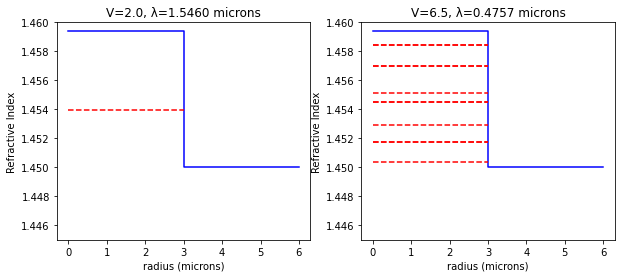

In [6]:
n_clad =1.45
Delta=0.0064
r_core=3.0           # microns
λ = 1.546 # microns

n_core = n_clad / np.sqrt(1 - 2*Delta)
NA = np.sqrt(n_core**2-n_clad**2)
V = r_core * (2 * np.pi / λ) * NA

plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot([0,r_core,r_core,2*r_core],[n_core,n_core,n_clad,n_clad],color='blue')
for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for b in all_b:
        bt = np.sqrt(n_clad**2+all_b*(n_core**2-n_clad**2))
        plt.plot([0,r_core],[bt,bt],'--r')

plt.ylim(1.445,1.46)
plt.title("V=%.1f, λ=%.4f microns" % (V,λ))
plt.xlabel("radius (microns)")
plt.ylabel("Refractive Index")


λ = 0.4757# microns
n_core = n_clad / np.sqrt(1 - 2*Delta)
NA = np.sqrt(n_core**2-n_clad**2)
V = r_core * (2 * np.pi / λ) * NA

plt.subplot(1, 2, 2)

plt.plot([0,r_core,r_core,2*r_core],[n_core,n_core,n_clad,n_clad],color='blue')
for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for b in all_b:
        bt = np.sqrt(n_clad**2+all_b*(n_core**2-n_clad**2))
        plt.plot([0,r_core],[bt,bt],'--r')

plt.ylim(1.445,1.46)
plt.title("V=%.1f, λ=%.4f microns" % (V,λ))
plt.xlabel("radius (microns)")
plt.ylabel("Refractive Index")

plt.show()

## Figure 8.3

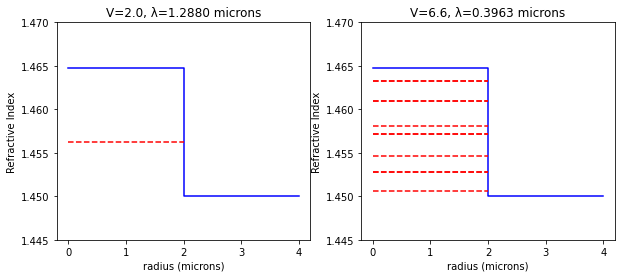

In [7]:
n_clad =1.45
Delta=0.010
r_core=2.0           # microns

λ = 1.288 # microns
n_core = n_clad / np.sqrt(1 - 2*Delta)
NA = np.sqrt(n_core**2-n_clad**2)
V = r_core * (2 * np.pi / λ) * NA

plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot([0,r_core,r_core,2*r_core],[n_core,n_core,n_clad,n_clad],color='blue')
for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for b in all_b:
        bt = np.sqrt(n_clad**2+all_b*(n_core**2-n_clad**2))
        plt.plot([0,r_core],[bt,bt],'--r')
plt.ylim(1.445,1.47)
plt.title("V=%.1f, λ=%.4f microns" % (V,λ))
plt.xlabel("radius (microns)")
plt.ylabel("Refractive Index")


λ = 0.3963# microns
n_core = n_clad / np.sqrt(1 - 2*Delta)
NA = np.sqrt(n_core**2-n_clad**2)
V = r_core * (2 * np.pi / λ) * NA

plt.subplot(1, 2, 2)
plt.plot([0,r_core,r_core,2*r_core],[n_core,n_core,n_clad,n_clad],color='blue')
for ell in range(6):
    all_b = ofiber.LP_mode_values(V,ell)
    for b in all_b:
        bt = np.sqrt(n_clad**2+all_b*(n_core**2-n_clad**2))
        plt.plot([0,r_core],[bt,bt],'--r')

plt.ylim(1.445,1.47)
plt.title("V=%.1f, λ=%.4f microns" % (V,λ))
plt.xlabel("radius (microns)")
plt.ylabel("Refractive Index")

plt.show()

## Ghatak Figure 8.4

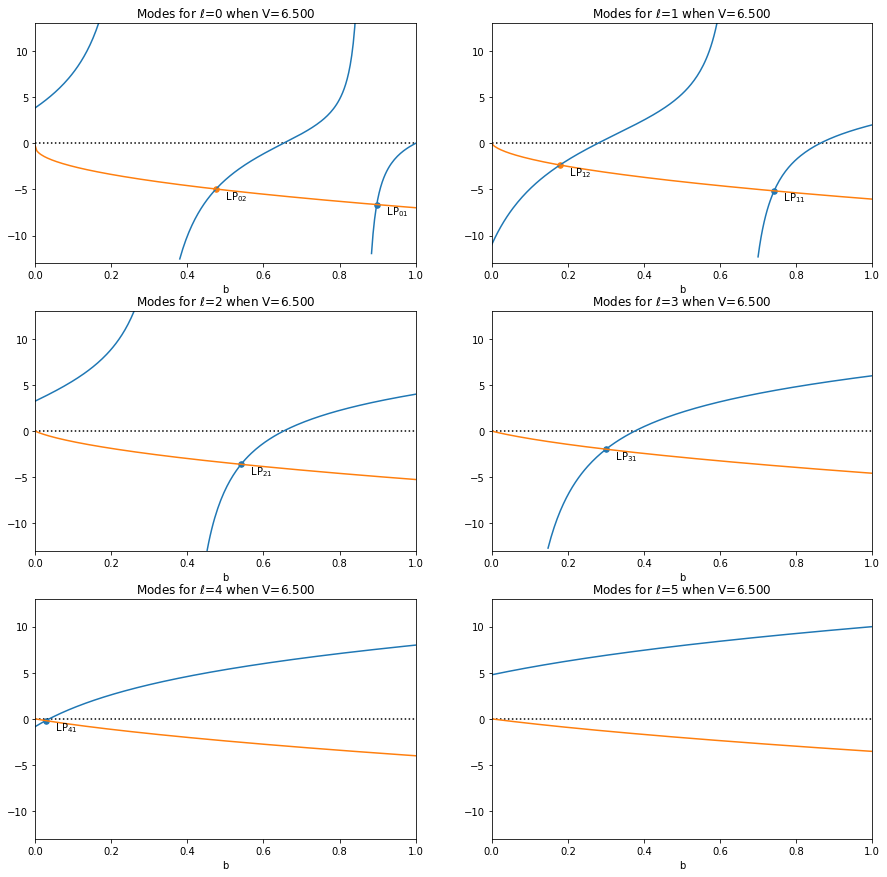

In [8]:
V=6.5

plt.subplots(3, 2, figsize=(15, 15))
for ell in range(6):
    aplt.subplot(3,2,ell+1)
    aplt = ofiber.plot_LP_modes(V,ell)

aplt.show()

## Variation of normalized propagation constant with V

Ghatak Figure 8.5

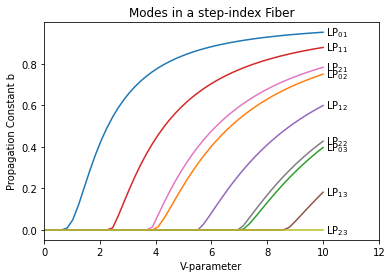

In [9]:
V = np.linspace(0.01,10,50)
b = np.empty_like(V)

for ell in range(3):
    for em in range(1,4):
        for i in range(len(V)):
            b[i] = ofiber.LP_mode_value(V[i],ell,em)
        plt.plot(V,b)
        plt.annotate(r' LP$_{%d%d}$'%(ell,em), xy=(10,b[-1]),va='center')

plt.xlim(0,12)
plt.xlabel("V-parameter")
plt.ylabel('Propagation Constant b')
plt.title('Modes in a step-index Fiber')
plt.show()

## Radial Intensity distributions

Ghatak Figure 8.6

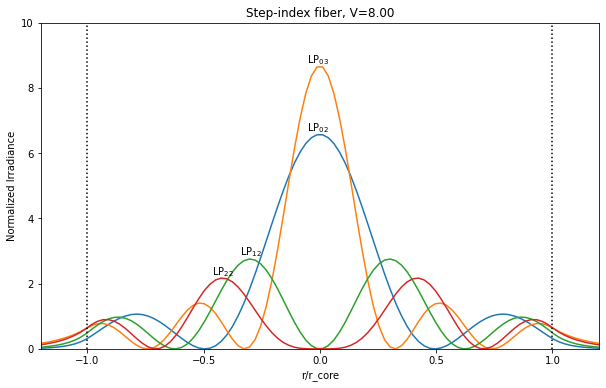

In [10]:
plt.subplots(figsize=(10,6))
r_over_a = np.linspace(-1.2,1.2,100)
V=8
for ell in range(3):
    for em in range(2,4):
        b = ofiber.LP_mode_value(V,ell,em)
        if b == 0 :
            continue
        irradiance = ofiber.LP_radial_irradiance(V,b,ell,r_over_a)
        i = np.argmax(irradiance)

        plt.plot(r_over_a,irradiance)
        plt.annotate(r' LP$_{%d%d}$'%(ell,em), xy=(r_over_a[i],irradiance[i]),va='bottom',ha='center')

plt.xlabel('r/r_core')
plt.ylabel('Normalized Irradiance')
plt.plot([-1,-1],[0,10],':k')
plt.plot([1,1],[0,10],':k')

plt.title('Step-index fiber, V=%.2f'%V)
plt.ylim(0,10)
plt.xlim(-1.2,1.2)
plt.show()

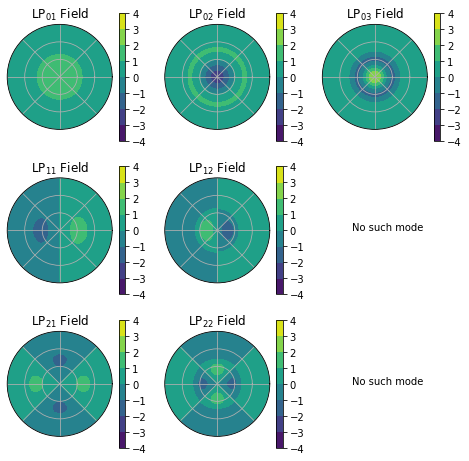

In [11]:
V=8

r_over_a = np.linspace(0, 1.5, 50)
phi = np.linspace(0, 2*np.pi, 40)

clevs = np.linspace(-4, 4, 9)

fig,ax=plt.subplots(3,3,figsize=(8,8))

graph = 0
for ell in [0,1,2]:
    for em in [1,2,3]:
        graph = graph+1 
        
        b = ofiber.LP_mode_value(V,ell,em)
        if b==0 :
            ax=plt.subplot(3,3,graph,polar=True)
            plt.axis('off')
            plt.annotate('No such mode', xy=(0,0), ha='center')
            continue
        r_field = ofiber.LP_radial_field(V,b,ell,r_over_a)
        phi_field = np.cos(ell*phi)
        R, PHI = np.meshgrid(r_over_a, phi)
        R_FIELD, PHI_FIELD = np.meshgrid(phi_field,r_field)
        Z = R_FIELD*PHI_FIELD

        ax=plt.subplot(3,3,graph,polar=True)
        cax=ax.contourf(phi,r_over_a,Z,levels=clevs)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        fig.colorbar(cax)
        plt.title(r"LP$_{%d%d}$ Field"%(ell,em))

plt.show()

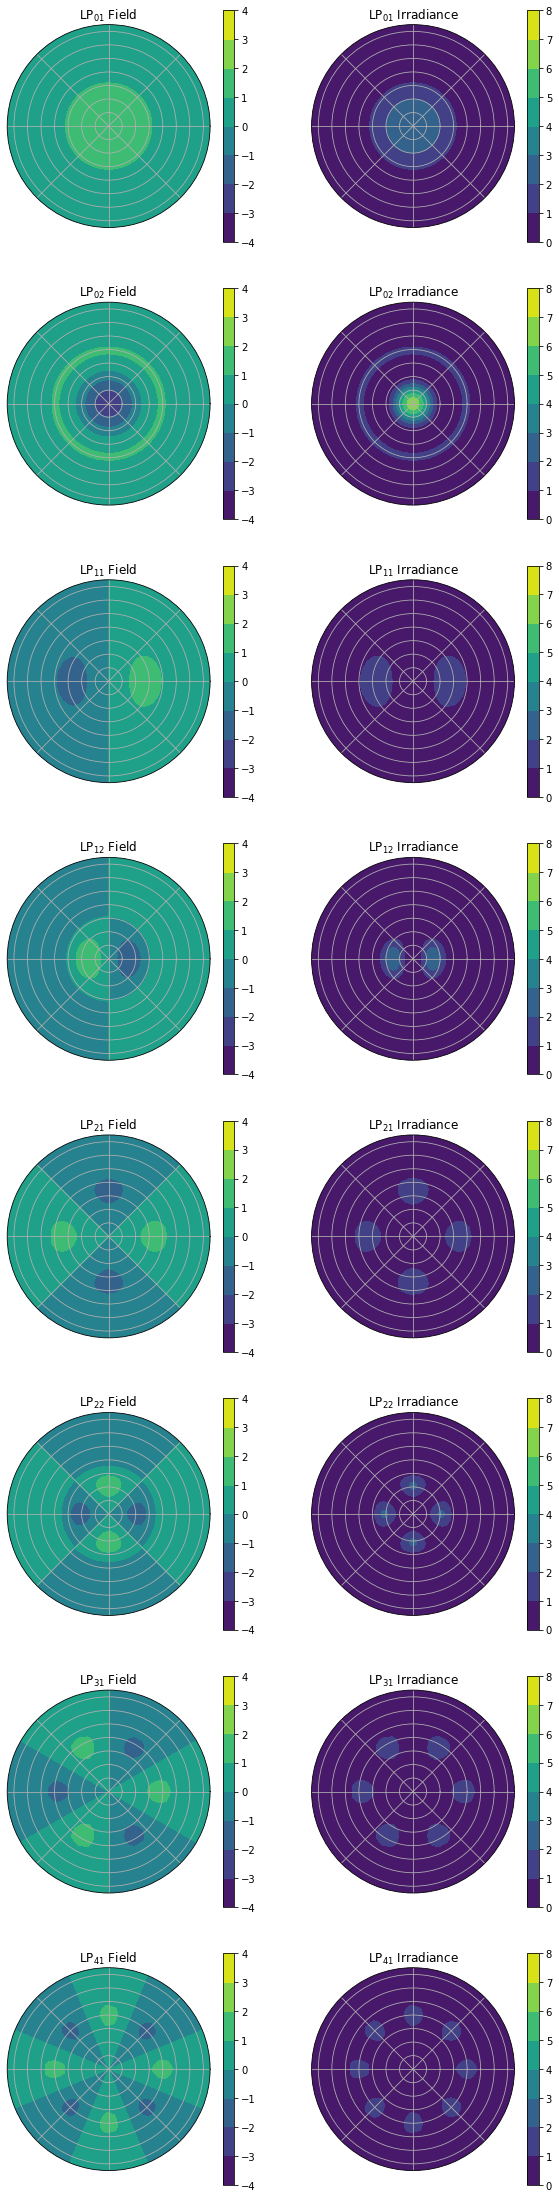

In [12]:
V=8

r_over_a = np.linspace(0, 1.5, 50)
phi = np.linspace(0, 2*np.pi, 40)
R, PHI = np.meshgrid(r_over_a, phi)

clevs = np.linspace(-4, 4, 9)
dlevs = np.linspace(0, 8, 9)

fig,ax=plt.subplots(figsize=(10,40))

graph = 0
rows = 8
cols = 2
for ell in range(5):
    phi_field = np.cos(ell*phi)

    for em in [1,2]:
        
        b = ofiber.LP_mode_value(V,ell,em)
        if b==0 :
            continue
        r_field = ofiber.LP_radial_field(V,b,ell,r_over_a)
        R_FIELD, PHI_FIELD = np.meshgrid(phi_field,r_field)
        Z = R_FIELD*PHI_FIELD

        graph += 1 

        ax=plt.subplot(rows,cols,graph,polar=True)
        cax=ax.contourf(phi,r_over_a,Z,levels=clevs)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        fig.colorbar(cax)
        plt.title(r"LP$_{%d%d}$ Field"%(ell,em))
        
        graph += 1
        Z = Z*Z

        ax=plt.subplot(rows,cols,graph,polar=True)
        cax=ax.contourf(phi,r_over_a,Z,levels=dlevs)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        fig.colorbar(cax)
        plt.title(r"LP$_{%d%d}$ Irradiance"%(ell,em))

plt.show()

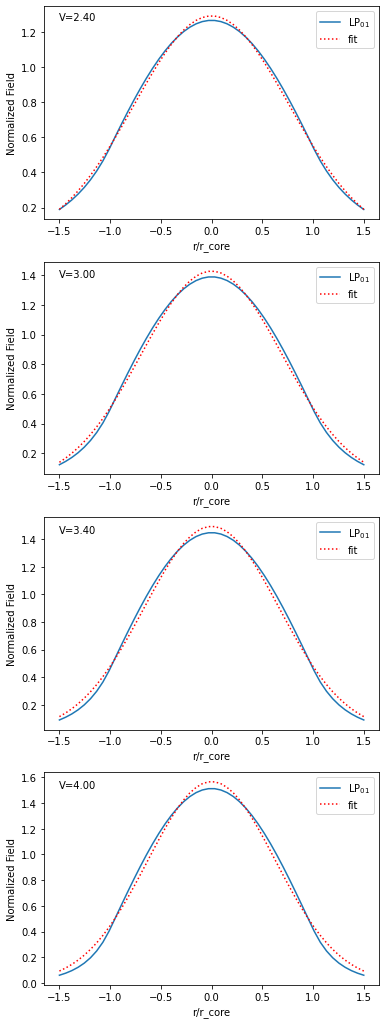

In [13]:
from scipy.optimize import curve_fit

def gauss(x, A, w):
    return A*np.exp(-x**2/w**2)

r_over_a = np.linspace(-1.5, 1.5, 50)
phi = 0


graph = 1
rows = 4
cols = 1

fig,ax=plt.subplots(figsize=(6,18))

ell = 0
em = 1

for V in [2.4,3,3.4,4]:

    b = ofiber.LP_mode_value(V,ell,em)
    field = ofiber.LP_radial_field(V,b,ell,r_over_a)

    plt.subplot(rows,cols,graph)
    plt.plot(r_over_a,field,label=r'LP$_{01}$')
    plt.annotate("V=%.2f"%V, xy=(-1.5,max(field)))
    
    popt, pcov = curve_fit(gauss, r_over_a, field)
    fit = gauss(r_over_a,popt[0],popt[1])
    plt.plot(r_over_a,fit,':r',label='fit')

    plt.ylabel('Normalized Field')
    plt.xlabel('r/r_core')
    plt.legend()
    graph += 1    

plt.show()

## Variation of the fractional power contained in the cladding with V

Ghatak Figure 8.11

/Users/prahl/Documents/Code/git/ofiber/ofiber/cylinder_step.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return kn(ell + 1, W) * kn(ell - 1, W) / kn(ell, W)**2 - 1
/Users/prahl/Documents/Code/git/ofiber/ofiber/cylinder_step.py:307: RuntimeWarning: invalid value encountered in double_scalars
  val *= kn(ell - 1, W) / kn(ell, W)**2
/Users/prahl/Documents/Code/git/ofiber/ofiber/cylinder_step.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return kn(ell + 1, W) * kn(ell - 1, W) / kn(ell, W)**2 - 1
/Users/prahl/Documents/Code/git/ofiber/ofiber/cylinder_step.py:307: RuntimeWarning: invalid value encountered in double_scalars
  val *= kn(ell - 1, W) / kn(ell, W)**2
/Users/prahl/Documents/Code/git/ofiber/ofiber/cylinder_step.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return kn(ell + 1, W) * kn(ell - 1, W) / kn(ell, W)**2 - 1
/Users/prahl/Documents/Code/git/ofiber/ofiber/cylinder_step.py:307: RuntimeWarning: invalid value

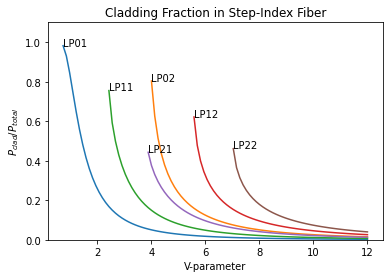

In [14]:
V=np.linspace(0.01,12,100)
ratio = np.empty_like(V)


ell = 0
for ell in [0,1,2]:

    for em in [1,2]:

        for i in range(len(V)):
            b = ofiber.LP_mode_value(V[i],ell,em)
            clad = ofiber.LP_clad_irradiance(V[i],b,ell)
            total = ofiber.LP_total_irradiance(V[i],b,ell)
            ratio[i] = clad/total
        
        j = np.nanargmax(ratio)
        plt.annotate("LP%d%d"%(ell,em),xy=(V[j],ratio[j]))

        plt.plot(V,ratio)
plt.xlabel('V-parameter')
plt.ylabel(r'$P_{clad}/P_{total}$')
plt.ylim(0,1.1)
plt.title('Cladding Fraction in Step-Index Fiber')
plt.show()

## Variation of loss at a perfectly aligned joint between two single-mode fibers

Ghatak Figure 8.14

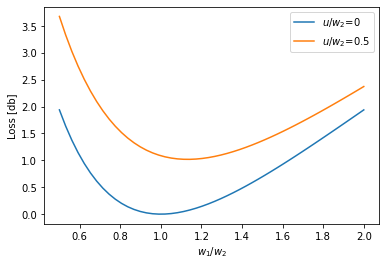

In [15]:
w1 = np.linspace(0.5,2,50)
w2 = np.ones_like(w1)

loss_db = ofiber.transverse_misalignment_loss_db(w1,w2,0)
plt.plot(w1,loss_db,label=r'$u/w_2$=0')

loss_db = ofiber.transverse_misalignment_loss_db(w1,w2,0.5)
plt.plot(w1,loss_db,label=r'$u/w_2$=0.5')

plt.xlabel(r'$w_1/w_2$')
plt.ylabel('Loss [db]')
plt.legend()
plt.show()


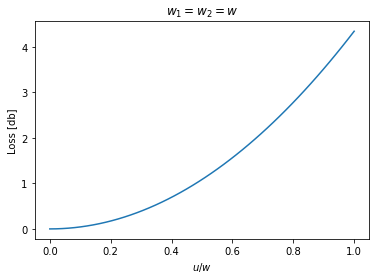

In [16]:
u = np.linspace(0,1,50)

loss_db = ofiber.transverse_misalignment_loss_db(1,1,u)
plt.plot(u,loss_db)

plt.xlabel(r'$u/w$')
plt.ylabel('Loss [db]')
plt.title(r'$w_1=w_2=w$')
plt.show()